# EDA e Preprocessamento de Dados

## Configurações iniciais

In [40]:
# Importações de libraries importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [41]:
# Tema
sns.set_theme(style="ticks", palette="flare")

# Carregamento de dataframe
df = pd.read_csv("../dados/data.csv")
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [42]:
# Identificando valores null

print(pd.isna(df).sum())

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


                    Age  ServicesOpted    Target
Age            1.000000      -0.012422 -0.131534
ServicesOpted -0.012422       1.000000  0.038646
Target        -0.131534       0.038646  1.000000


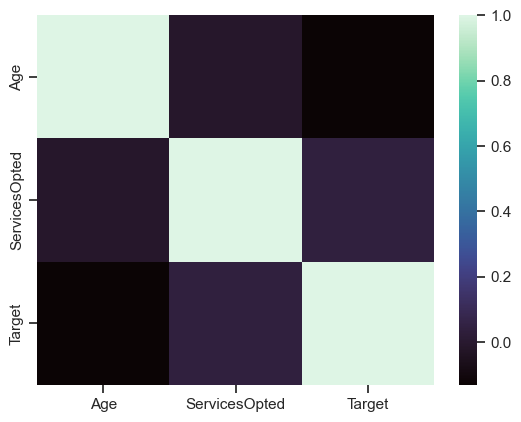

In [43]:
# Identificando correlação

sns.heatmap(df.corr(), cmap="mako")

print(df.corr())

In [44]:
# Função para plotar as distribuições das variáveis

def plota_dados_hist(coluna):
    
    sns.histplot(df[coluna], stat="percent")
    plt.title(f"Percentual de {coluna}")
    plt.ylabel("Percentual")
    plt.xlabel(None)
    plt.show()

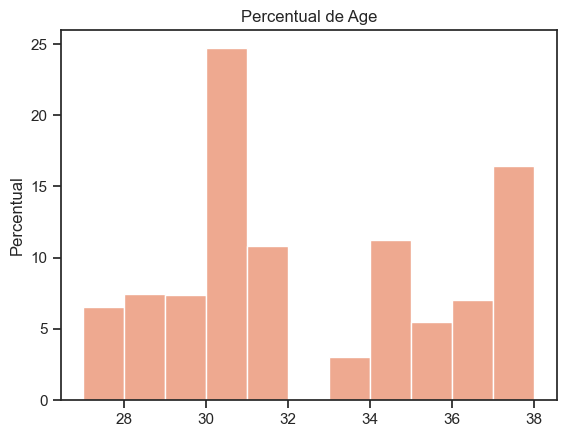

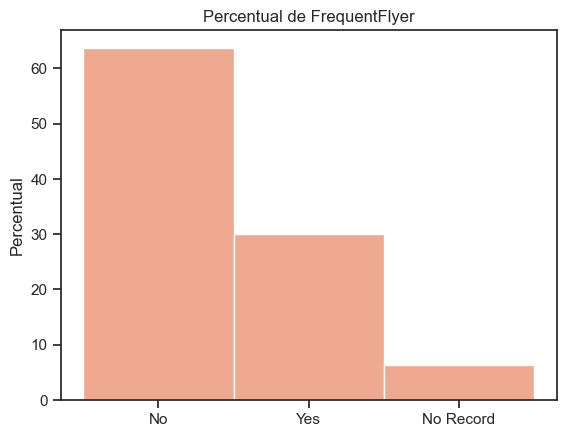

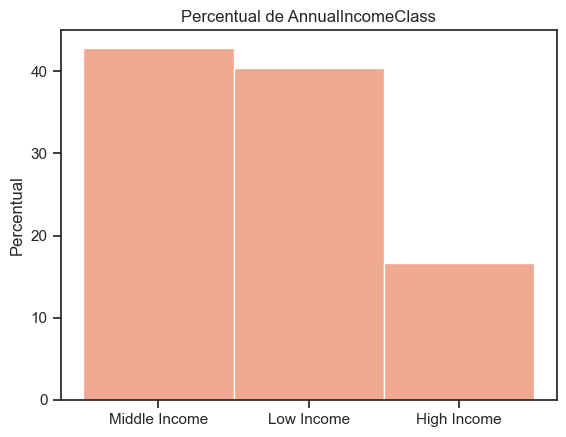

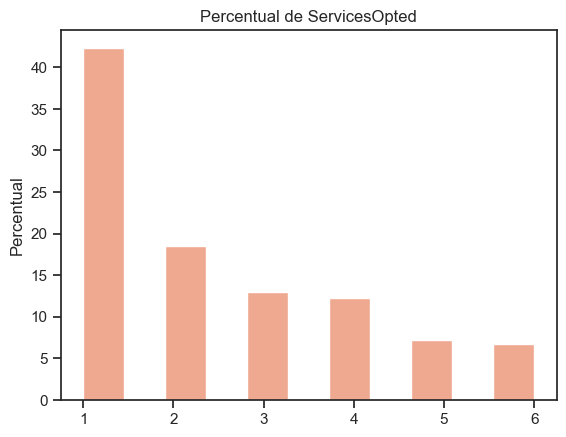

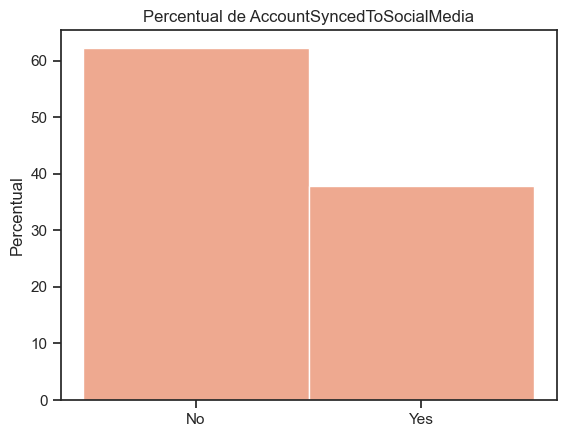

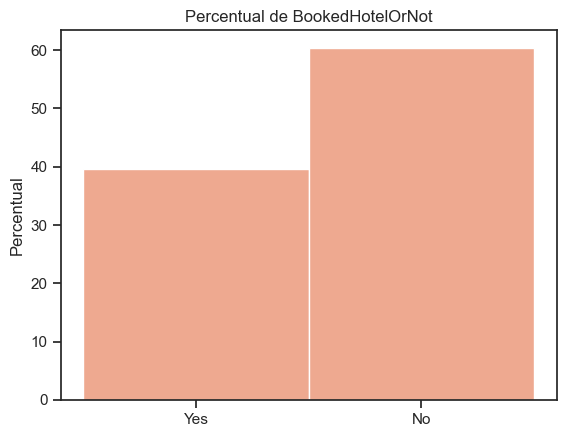

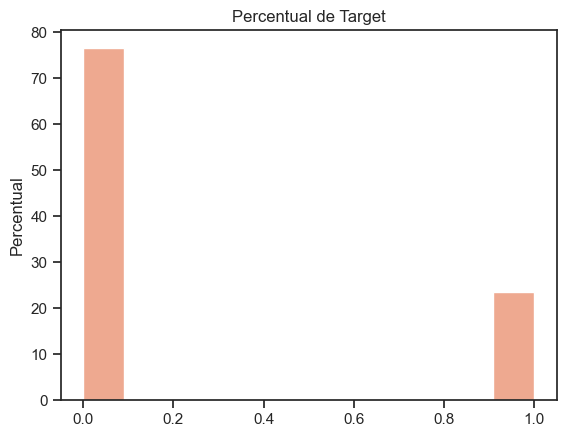

In [45]:
for coluna in df.columns:
    plota_dados_hist(coluna)

In [33]:
# One-hot encoding das variáveis categóricas

categoricas = ["AnnualIncomeClass", "ServicesOpted"]

df = pd.get_dummies(df, columns=categoricas)

In [11]:
df

,Age,FrequentFlyer,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,ServicesOpted_1,ServicesOpted_2,ServicesOpted_3,ServicesOpted_4,ServicesOpted_5,ServicesOpted_6
0,34,No,No,Yes,0,0,0,1,0,0,0,0,0,1
1,34,Yes,Yes,No,1,0,1,0,0,0,0,0,1,0
2,37,No,Yes,No,0,0,0,1,0,0,1,0,0,0
3,30,No,No,No,0,0,0,1,0,1,0,0,0,0
4,30,No,No,No,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,31,Yes,No,No,0,0,1,0,1,0,0,0,0,0
950,30,No,No,Yes,0,0,0,1,0,0,0,0,1,0
951,37,No,No,No,0,0,0,1,0,0,0,1,0,0
952,30,No,Yes,Yes,0,0,1,0,1,0,0,0,0,0


In [12]:
colunas_one_encoding = ["FrequentFlyer", "AccountSyncedToSocialMedia", "BookedHotelOrNot"]

for coluna in colunas_one_encoding:
    
    df[coluna] = df[coluna].map({"Yes": 1, "No": 0})

In [13]:
df

,Age,FrequentFlyer,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,ServicesOpted_1,ServicesOpted_2,ServicesOpted_3,ServicesOpted_4,ServicesOpted_5,ServicesOpted_6
0,34,0.0,0,1,0,0,0,1,0,0,0,0,0,1
1,34,1.0,1,0,1,0,1,0,0,0,0,0,1,0
2,37,0.0,1,0,0,0,0,1,0,0,1,0,0,0
3,30,0.0,0,0,0,0,0,1,0,1,0,0,0,0
4,30,0.0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,31,1.0,0,0,0,0,1,0,1,0,0,0,0,0
950,30,0.0,0,1,0,0,0,1,0,0,0,0,1,0
951,37,0.0,0,0,0,0,0,1,0,0,0,1,0,0
952,30,0.0,1,1,0,0,1,0,1,0,0,0,0,0


In [14]:
scaler = MinMaxScaler()

In [15]:
df["Age"] = scaler.fit_transform(df["Age"].to_numpy().reshape(-1, 1))

In [16]:
df

,Age,FrequentFlyer,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,ServicesOpted_1,ServicesOpted_2,ServicesOpted_3,ServicesOpted_4,ServicesOpted_5,ServicesOpted_6
0,0.636364,0.0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.636364,1.0,1,0,1,0,1,0,0,0,0,0,1,0
2,0.909091,0.0,1,0,0,0,0,1,0,0,1,0,0,0
3,0.272727,0.0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.272727,0.0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.363636,1.0,0,0,0,0,1,0,1,0,0,0,0,0
950,0.272727,0.0,0,1,0,0,0,1,0,0,0,0,1,0
951,0.909091,0.0,0,0,0,0,0,1,0,0,0,1,0,0
952,0.272727,0.0,1,1,0,0,1,0,1,0,0,0,0,0


In [17]:
df = df.dropna()

In [18]:
Y = df.iloc[:, 4:5].to_numpy()
X = df.drop("Target", axis=1).to_numpy()


No dataset de treino, existe um evidente _class imbalance_ que deve ser contornado para melhor performance do modelo. A técnica utilizada será o random oversampling, geração aleatória de datapoints gêmeos dos observados.

In [19]:
# Random oversampling
sampler = RandomOverSampler(random_state=30)
X, Y = sampler.fit_resample(X, Y)

In [20]:
X

array([[0.63636364, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.63636364, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.90909091, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09090909, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
Y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15)


In [23]:
# Serialização de datasets
pl.dump(X_train, open("../dados/x_train.pkl", "wb"))
pl.dump(Y_train, open("../dados/y_train.pkl", "wb"))
pl.dump(X_test, open("../dados/x_test.pkl", "wb"))
pl.dump(Y_test, open("../dados/y_test.pkl", "wb"))